In [119]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os


In [120]:
tile_path = './tile_meta.csv'
tile_meta = pd.read_csv(tile_path)
tile_meta.head()

,id,source_wsi,dataset,i,j
0,0006ff2aa7cd,2,2,16896,16420
1,000e79e206b7,6,3,10240,29184
2,00168d1b7522,2,2,14848,14884
3,00176a88fdb0,7,3,14848,25088
4,0033bbc76b6b,1,1,10240,43008


In [121]:
# get the first id
# test = tile_meta['id'].iloc[3]
test = "0a43459733e7"
print(test)

0a43459733e7


In [122]:
jsonObj = pd.read_json('./polygons.jsonl', lines=True)

In [123]:
print(jsonObj.head())

             id                                        annotations
0  0006ff2aa7cd  [{'type': 'glomerulus', 'coordinates': [[[167,...
1  00168d1b7522  [{'type': 'glomerulus', 'coordinates': [[[511,...
2  0033bbc76b6b  [{'type': 'blood_vessel', 'coordinates': [[[16...
3  003504460b3a  [{'type': 'blood_vessel', 'coordinates': [[[40...
4  004daf1cbe75  [{'type': 'blood_vessel', 'coordinates': [[[14...


In [124]:
# convert the json object to a dataframe
df = pd.DataFrame(jsonObj)

In [125]:
# get row where id is equal to the first id in the tile_meta dataframe
tileRow = df.loc[df['id'] == test]
print(tileRow)
# get the annotations column value
annotations = list(tileRow['annotations'])[0]

for i in range(len(annotations)):
    print(annotations[i]["type"])


              id                                        annotations
67  0a43459733e7  [{'type': 'blood_vessel', 'coordinates': [[[38...
blood_vessel
unsure
blood_vessel
blood_vessel
blood_vessel
blood_vessel
blood_vessel


[[[38, 497], [37, 497], [36, 497], [35, 497], [34, 497], [33, 497], [32, 497], [32, 496], [31, 496], [31, 495], [30, 495], [30, 494], [29, 494], [29, 493], [28, 493], [27, 493], [27, 492], [26, 492], [26, 491], [25, 491], [25, 490], [24, 490], [24, 489], [23, 489], [23, 488], [22, 488], [22, 487], [22, 486], [21, 486], [21, 485], [20, 485], [20, 484], [20, 483], [20, 482], [19, 482], [19, 481], [18, 481], [18, 480], [17, 480], [17, 479], [16, 479], [15, 479], [15, 478], [14, 478], [13, 478], [13, 477], [12, 477], [11, 477], [11, 476], [10, 476], [9, 476], [9, 475], [8, 475], [8, 474], [8, 473], [7, 473], [7, 472], [7, 471], [6, 471], [6, 470], [6, 469], [6, 468], [5, 468], [5, 467], [4, 467], [4, 466], [3, 466], [3, 465], [2, 465], [2, 464], [2, 463], [1, 463], [1, 462], [0, 462], [0, 461], [0, 460], [0, 459], [0, 458], [0, 457], [0, 456], [0, 455], [0, 454], [0, 453], [0, 452], [0, 451], [0, 450], [0, 449], [1, 448], [1, 449], [2, 449], [2, 450], [2, 451], [3, 451], [3, 452], [3, 453]

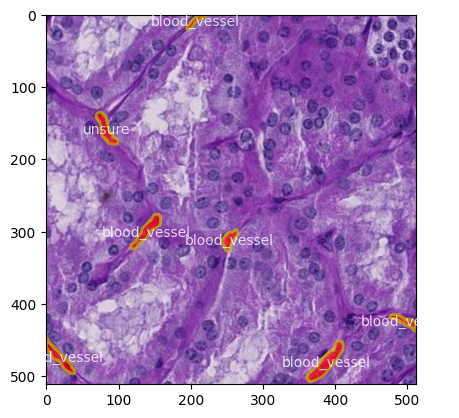

In [126]:
import matplotlib.pyplot as plt
from matplotlib.patches import Polygon
from PIL import Image, ImageDraw

# Load your image
path = f"./train/{test}.tif"
im = Image.open(path)

# Create a Matplotlib figure
fig, ax = plt.subplots()

# Display the image using Matplotlib
ax.imshow(im)

# Loop through the annotations
for annotation in annotations:
    typeOf = annotation["type"]

    # Get the coordinates of the polygon
    polygonCoordinates = annotation["coordinates"]

    # Loop through the polygon coordinates and draw each polygon with the type label
    for polygon in polygonCoordinates:
        poly = Polygon(polygon, closed=True, edgecolor='y', facecolor='r', fill=True, alpha=0.7, linewidth=2, linestyle='-', joinstyle='round', capstyle='round')
        ax.add_patch(poly)

        # Add the type label within the polygon
        x, y = zip(*polygon)
        x_center = sum(x) / len(x)
        y_center = sum(y) / len(y)
        ax.text(x_center, y_center, typeOf, color='w',alpha=0.8, ha='center', va='center')

# Show the image with polygons and type labels
plt.show()
